<a href="https://colab.research.google.com/github/Auta01/Pytorch/blob/main/pytorch_classification_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Network Clasification

In [ ]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 100

X,y = make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

In [ ]:
len(X), len(y)

(100, 100)

In [ ]:
print(f'{X[:5]}')
print(f'{y[:5]}')

[[-0.40957228 -0.70266396]
 [ 0.75810247  0.33360948]
 [-0.64086599  0.48813954]
 [ 0.78212694 -0.59114489]
 [ 0.77303687 -0.71826406]]
[1 1 1 0 0]


In [ ]:
#Make dataframe of circles data
import pandas as pd
circles =pd.DataFrame({'X1':X[:,0],
                      'X2':X[:,1],
                      'label':y})

circles.head(10)

,X1,X2,label
0,-0.409572,-0.702664,1
1,0.758102,0.333609,1
2,-0.640866,0.488140,1
3,0.782127,-0.591145,0
4,0.773037,-0.718264,0
5,0.215881,-0.930492,0
6,-0.916040,0.317596,0
7,-0.637408,-0.472662,1
8,0.323051,0.973140,0
9,0.976609,-0.025317,0


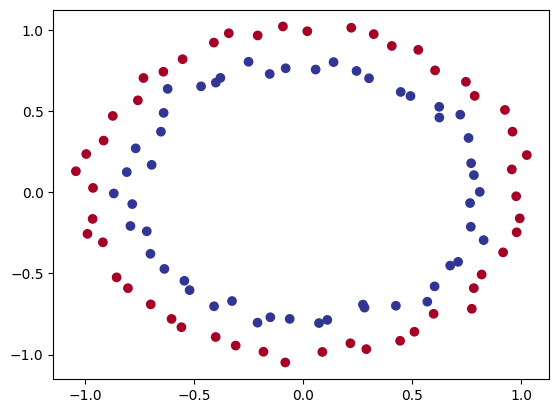

In [ ]:
#Visualize , Visualize, Visaulize

import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
## check input and output shapes
X.shape, y.shape


((100, 2), (100,))

In [ ]:
#view the first sample of feature and labels
X_sample = X[0]
y_sample = y[0]

print(f'values for one sample of x: {X_sample} and the same for y:{y_sample}')
print(f'shapes of one samples of X:{X_sample.shape}and the same for y:{y_sample.shape}')

values for one sample of x: [-0.40957228 -0.70266396] and the same for y:1
shapes of one samples of X:(2,)and the same for y:()


Turning data into tensor

In [ ]:
#Turn data into tensor
import torch

# Convert X to tensor if it's not already one
if not isinstance(X, torch.Tensor):
    X = torch.from_numpy(X).type(torch.float)

# Convert y to tensor if it's not already one
if not isinstance(y, torch.Tensor):
    y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[-0.4096, -0.7027],
         [ 0.7581,  0.3336],
         [-0.6409,  0.4881],
         [ 0.7821, -0.5911],
         [ 0.7730, -0.7183]]),
 tensor([1., 1., 1., 0., 0.]))

In [ ]:
type(X), X.dtype , y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
#split data into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

In [ ]:
#2Building a model
import torch
from torch import nn

#construct a model that subclasses nn.module
class circleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    #2.Create 2 nn.linear
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)
#Define a forward method that outlines the forward pass
  def forward(self, X):
    return self.layer_2(self.layer_1(X))

    #instanciate an instance of our model class and send it to the target device

# Get CPU, GPU or MPS device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

model_0 = circleModelV0().to(device)
model_0

Using cpu device


circleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
## lets replicate the model above using nn.sequential

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)

)

In [ ]:
#Make some predictions
with torch.inference_mode():
  untrained_preds =model_0(X_test.to(device))

print(f'Length of predictions: {len(untrained_preds)}, shape:{untrained_preds.shape}')
print(f'Length of test samples: {len(X_test)}, Shape:{X_test.shape}')
print(f'First 10 predictions {untrained_preds[:10]}')
print(f'First 10 test labels {y_test[:10]}')

Length of predictions: 20, shape:torch.Size([20, 1])
Length of test samples: 20, Shape:torch.Size([20, 2])
First 10 predictions tensor([[-1.0720],
        [-0.8879],
        [-0.9656],
        [-0.6035],
        [-1.0279],
        [-0.4111],
        [-0.9876],
        [-0.3462],
        [-0.5571],
        [-0.9711]])
First 10 test labels tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1.])


In [ ]:
##Setting up a loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1 )

In [ ]:
#calculate the accuracy of 100 examples what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc =correct/len(y_pred)*100
  return acc

In [ ]:
##view thr first 5 output of the forward pass on the test data
with torch.inference_mode():

 y_logits = model_0(X_test.to(device)[:5])
y_logits


tensor([[-1.0720],
        [-0.8879],
        [-0.9656],
        [-0.6035],
        [-1.0279]])

In [ ]:
#use a sigmiod activation function to turn them into predcition probabilities

y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs

tensor([[0.2550],
        [0.2915],
        [0.2758],
        [0.3535],
        [0.2635]])

In [ ]:
#find the predicted lables
y_preds = torch.round(y_preds_probs)

#in full
y_preds_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))[:5]

#Check for equality
print(torch.eq(y_preds.squeeze(), y_preds_labels.squeeze()))

#Get rid of extra dimension
y_preds.squeeze()


tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

In [ ]:
y_test[:5]

tensor([0., 0., 1., 0., 0.])

In [ ]:
#Building a Trainig loop and testing optimization loop
torch.manual_seed(42)
#set the number of epochs
epochs = 100

#put data to target device
X_train, y_train =X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Building training and evaluation loop
for epoch in range (epochs):
  #Training
  model_0.train()

  #froward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

 #Calculate the loss/accuracy
  loss = loss_fn(y_logits,
                  y_train)
  acc = accuracy_fn(y_true=y_train,
                     y_pred=y_pred)
  #optimizer zero grad
  optimizer.zero_grad()

  #loss backward
  loss.backward()

  #optimizers step
  optimizer.step()

  ##Testing
  model_0.eval()
  with torch.inference_mode():

    #forward pass
    test_logits =model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #Calculate the loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)


    #print out what is happeining
    if epoch % 10 == 0:
      print(f'Epoch:{epoch} | loss:{loss:.5f}, Acc:{acc:.2f}% | test loss{test_loss:.5f},test acc:{test_acc:2f}%')


Epoch:0 | loss:0.76994, Acc:45.00% | test loss0.64878,test acc:70.000000%
Epoch:10 | loss:0.71850, Acc:40.00% | test loss0.66535,test acc:60.000000%
Epoch:20 | loss:0.70030, Acc:47.50% | test loss0.68727,test acc:50.000000%
Epoch:30 | loss:0.69330, Acc:52.50% | test loss0.70519,test acc:40.000000%
Epoch:40 | loss:0.69043, Acc:56.25% | test loss0.71814,test acc:45.000000%
Epoch:50 | loss:0.68919, Acc:61.25% | test loss0.72702,test acc:30.000000%
Epoch:60 | loss:0.68862, Acc:55.00% | test loss0.73296,test acc:30.000000%
Epoch:70 | loss:0.68833, Acc:55.00% | test loss0.73687,test acc:30.000000%
Epoch:80 | loss:0.68817, Acc:55.00% | test loss0.73941,test acc:30.000000%
Epoch:90 | loss:0.68806, Acc:55.00% | test loss0.74105,test acc:30.000000%


In [36]:
import requests
from pathlib import Path
#doenload helper fuction

if Path ('helper_functiom.py').is_file():
  print('helper_function.py already exist, skipping download')

else:
  print('Download helper_function.py')
  request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py')

with open('helper_function.py','wb')as f:
  f.write(request.content)
from helper_function import plot_predictions, plot_decision_boundary




Download helper_function.py


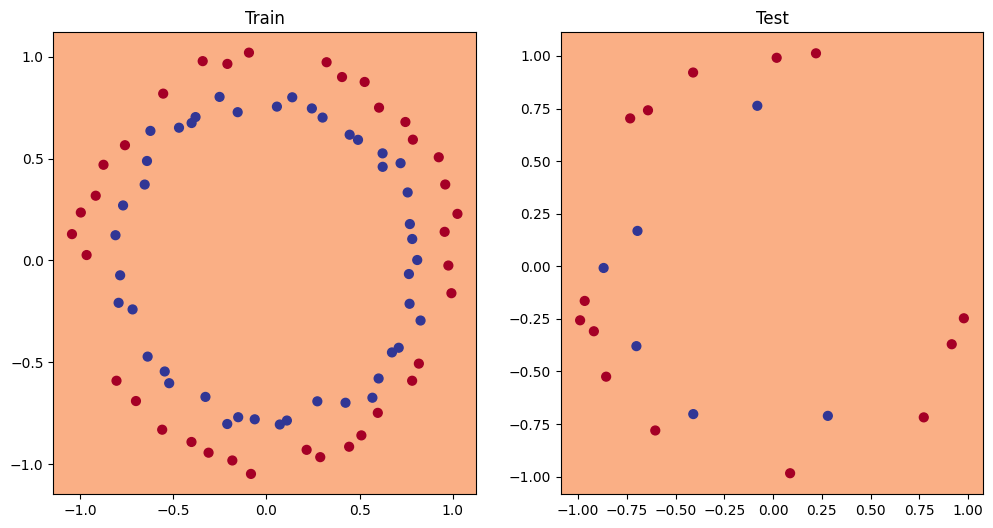

In [37]:
#plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0,X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_0, X_test,y_test)

In [41]:
##imporoving our model

class CirclesModelV1(nn.Module):
  def __init__(self):
   super().__init__()
   self.layer_1 = nn.Linear(in_features=2, out_features=10)
   self.layer_2 = nn.Linear(in_features=10, out_features=10)
   self.layer_3 = nn.Linear(in_features=10, out_features=10)


def forward(self, x):
  #x= self.layer_1(x)
  #z= self.layer_2(z)
  #z= self.layer_3(z)
  return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [45]:
import torch
from torch import nn

#Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)
#write a training and evaluation loop for model
torch.manual_seed(42)

#Train for longer
epochs =1000

#put data into target device
X_train, y_train = X_train.to(device),y_train.to(device)
X_test, y_test = X_test.to(device),y_test.to(device)


for epoch in range(epochs):
  #Training
  model_1.train()
  #forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  #optimizer zero grad
  optimizer.zero_grad()

  #loss backward(backpropagation)
  loss.backward()

  #optimizer step
  optimizer.step()

  ##Testing
  model_1.eval()
  with torch.inference_mode():
    #forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  #print out what happenin
  if epoch % 100 ==0:
    print(f'Epoch:{epoch} | Loss{loss:.5f},Acc:{acc:.2f}% | Test loss{test_loss:.5f}, Test Acc:{test_acc:.2f}%')


Epoch:0 | Loss0.72758,Acc:45.00% | Test loss0.63693, Test Acc:70.00%
Epoch:100 | Loss0.69493,Acc:45.00% | Test loss0.68849, Test Acc:60.00%
Epoch:200 | Loss0.68952,Acc:55.00% | Test loss0.71798, Test Acc:30.00%
Epoch:300 | Loss0.68857,Acc:55.00% | Test loss0.73107, Test Acc:30.00%
Epoch:400 | Loss0.68833,Acc:55.00% | Test loss0.73644, Test Acc:30.00%
Epoch:500 | Loss0.68821,Acc:55.00% | Test loss0.73865, Test Acc:30.00%
Epoch:600 | Loss0.68813,Acc:55.00% | Test loss0.73962, Test Acc:30.00%
Epoch:700 | Loss0.68806,Acc:55.00% | Test loss0.74012, Test Acc:30.00%
Epoch:800 | Loss0.68801,Acc:55.00% | Test loss0.74043, Test Acc:30.00%
Epoch:900 | Loss0.68796,Acc:55.00% | Test loss0.74067, Test Acc:30.00%


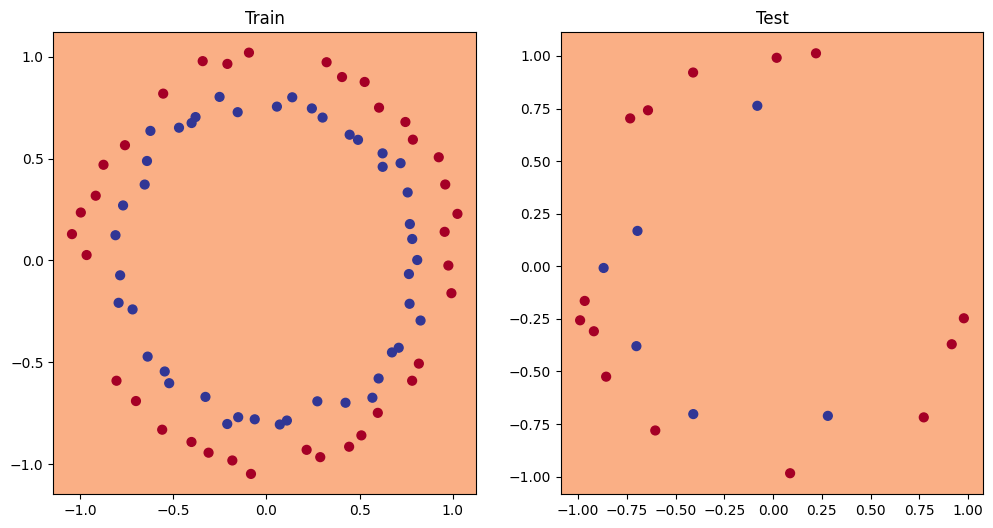

In [46]:
#plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1,X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_1, X_test,y_test)


In [49]:
##preparing our data to see if our model can fit a straight line

# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
stop = 0.01

#create data
x_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * x_regression+ bias

#Check the data
print(len(x_regression))
x_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [50]:
#Create train and test split
train_split = int(0.8*len(x_regression))
x_train_regression, y_train_regression = x_regression[:train_split], y_regression[:train_split]
x_test_regression, y_test_regression = x_regression[train_split:], y_regression[train_split:]

#Check the lengths of each
len(x_train_regression), len(y_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

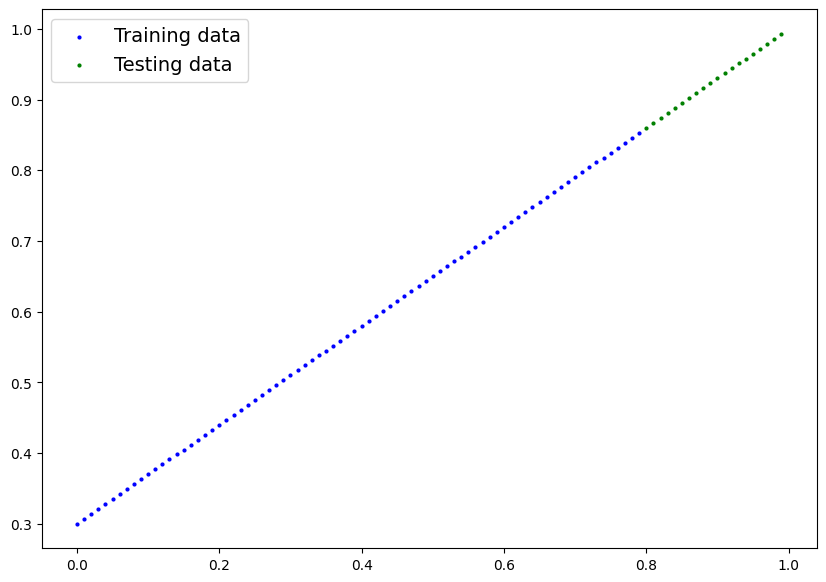

In [51]:
plot_predictions(train_data = x_train_regression,
               train_labels = y_train_regression,
               test_data = x_test_regression,
                test_labels=y_test_regression);

In [52]:
# Adjust model to fit a straight line
# same architecturre as model_1
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1))
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [58]:
#loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params =model_2.parameters(),
                            lr=0.01)

#Train
torch.manual_seed(42)

epochs = 1000
#put the data on thr target device
x_train_regression = x_train_regression.to(device)
y_train_regression = y_train_regression.to(device)
x_test_regression = x_test_regression.to(device)
y_test_regression = y_test_regression.to(device)


#Training
for epoch in range(epochs):
  model_2.train()
  y_pred = model_2(x_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Testing
  model_2.eval()

  with torch.inference_mode():
    test_pred = model_2(x_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  #print out what's happenin

  if epoch % 100 ==0:
    print(f'Epoch:{epoch}| Loss:{loss:.5f}| Test loss: {test_loss:.5f}')


Epoch:0| Loss:0.01782| Test loss: 0.00333
Epoch:100| Loss:0.01674| Test loss: 0.00317
Epoch:200| Loss:0.01640| Test loss: 0.00316
Epoch:300| Loss:0.01648| Test loss: 0.00256
Epoch:400| Loss:0.01648| Test loss: 0.00323
Epoch:500| Loss:0.01632| Test loss: 0.00337
Epoch:600| Loss:0.01597| Test loss: 0.00284
Epoch:700| Loss:0.01458| Test loss: 0.00244
Epoch:800| Loss:0.01532| Test loss: 0.00275
Epoch:900| Loss:0.01406| Test loss: 0.00288


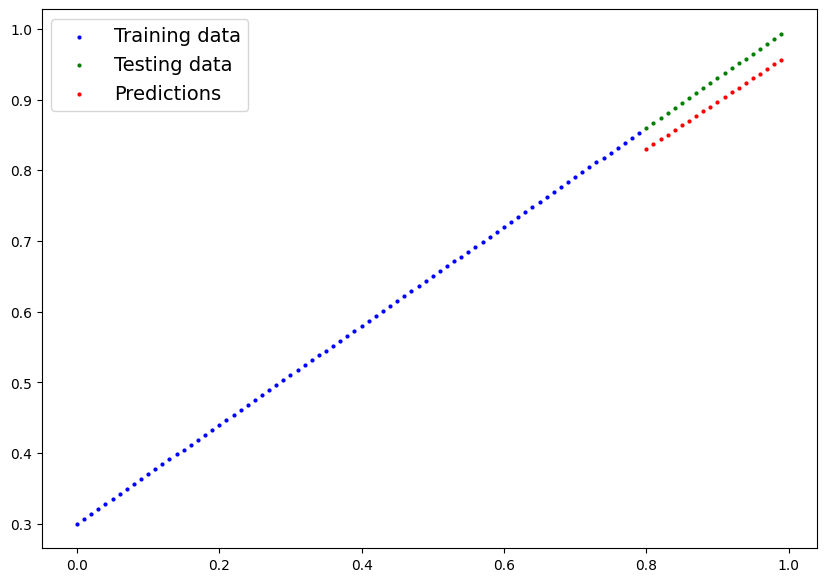

In [76]:
#Turn on the evaluation mode
model_2.eval()
#Make prediction(inference)
with torch.inference_mode():
  y_preds =model_2(x_test_regression)

#plot data and prediction
plot_predictions (train_data = x_train_regression.cpu(),
                  train_labels =y_train_regression.cpu(),
                  test_data = x_test_regression.cpu(),
                  test_labels = y_test_regression.cpu(),
                  predictions = y_preds.cpu());

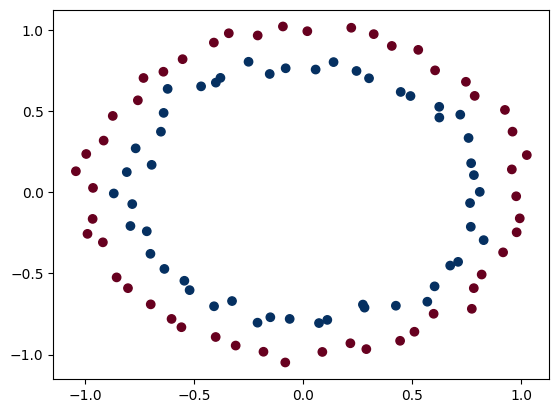

In [61]:
##The missing piece non-linearity
#REcreating non-linear

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 100
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdBu);

In [64]:
#Convert data to tensors and then to train and test splits

import torch
from sklearn.model_selection import train_test_split

#turn data into tensors
x= torch.from_numpy(x).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

#Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

x_train[:5], y_train[:5]

(tensor([[-0.7182, -0.2408],
         [-0.9960,  0.2350],
         [ 0.2890, -0.9665],
         [ 0.6045,  0.7500],
         [ 0.8273, -0.2954]]),
 tensor([1., 0., 0., 0., 1.]))

In [77]:
##Building a model with non-linearity
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    #where should we put our non-linear activation function
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [91]:
#setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_3.parameters(),
                            lr =0.01)

In [92]:
#Training a model with non-linearity
torch.manual_seed(42)

#put all the data on target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

#loop through data
epochs =1000
for epoch in range(epochs):
  ##Training
  model_3.train()
  #1forward pass
  y_logits = model_3(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  #optimizer zero_grad
  optimizer.zero_grad()
  #loss backward
  loss.backward()
  #optimizer step
  optimizer.step()

  ##Testing
  model_3.eval()
  with torch.inference_mode():
    #forward pass
    test_logits = model_3(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #Calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  #print out what's happening
  if epoch % 100 ==0:
    print(f'Epoch:{epoch} | Loss:{loss:.5f},Acc:{acc:.2f}% | Test loss:{test_loss:.5f}, Test Acc:{test_acc:.2f}%')


Epoch:0 | Loss:0.69234,Acc:55.00% | Test loss:0.69629, Test Acc:30.00%
Epoch:100 | Loss:0.68999,Acc:55.00% | Test loss:0.70614, Test Acc:30.00%
Epoch:200 | Loss:0.68894,Acc:55.00% | Test loss:0.71348, Test Acc:30.00%
Epoch:300 | Loss:0.68836,Acc:55.00% | Test loss:0.71889, Test Acc:30.00%
Epoch:400 | Loss:0.68801,Acc:55.00% | Test loss:0.72285, Test Acc:30.00%
Epoch:500 | Loss:0.68778,Acc:55.00% | Test loss:0.72573, Test Acc:30.00%
Epoch:600 | Loss:0.68761,Acc:55.00% | Test loss:0.72783, Test Acc:30.00%
Epoch:700 | Loss:0.68746,Acc:55.00% | Test loss:0.72934, Test Acc:30.00%
Epoch:800 | Loss:0.68733,Acc:55.00% | Test loss:0.73044, Test Acc:30.00%
Epoch:900 | Loss:0.68720,Acc:55.00% | Test loss:0.73126, Test Acc:30.00%


In [87]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5405,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3442,  0.4154],
                      [ 0.6234, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1046],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3259, -0.0829, -0.2872,  0.4691, -0.5581, -0.3260, -0.1997, -0.4252,
                       0.0668, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0527, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0857,  0.1331,  0.2822,  0.1828, -0.1382,  0.1826,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [93]:
#Testing
model_3.eval()
with torch.inference_mode():
  test_logits = model_3(x_test).squeeze() # Fixed typo: changed - to =
  test_pred = torch.round(torch.sigmoid(test_logits))

  test_loss = loss_fn(test_logits, y_test)
  test_acc = accuracy_fn(y_true=y_test,
                         y_pred =test_pred)

  print(f'Final Test loss: {test_loss:.5f}, Final Test Acc: {test_acc:.2f}%') # Added a print statement for final test results


Final Test loss: 0.73182, Final Test Acc: 30.00%


In [94]:
#Evaluate the model
# make prediction
model_3.eval()

with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(x_test))).squeeze()
  print(f'First 10 predictions: {y_preds[:10]}') # Added explicit print
  print(f'First 10 true labels: {y_test[:10]}') # Added explicit print


First 10 predictions: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
First 10 true labels: tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1.])


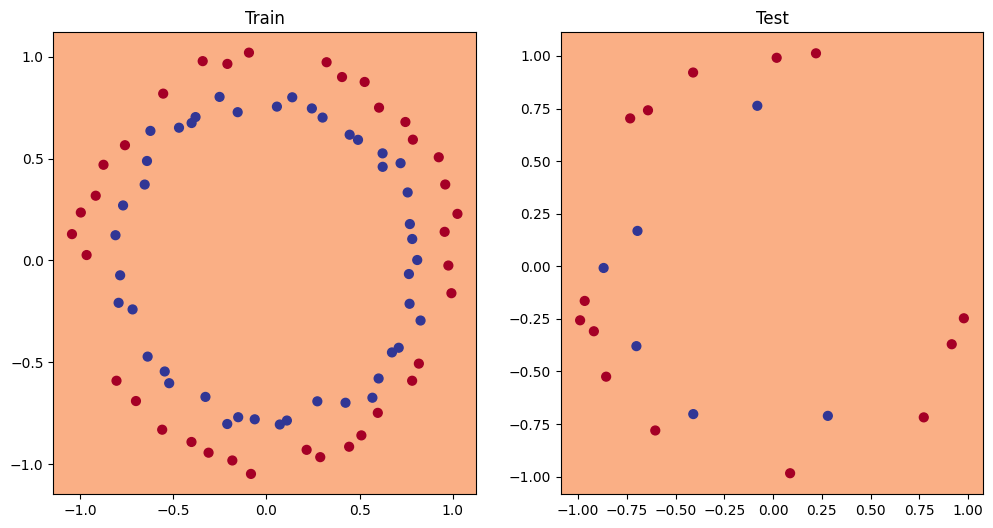

In [95]:
#plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_3,x_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_3, x_test, y_test)